# Conjunto de Dados - Preço de Venda de Casas

Este conjunto de dados contém informações sobre vendas recentes de casas, incluindo várias características estruturais e localização. O objetivo é prever o **Preço de Venda** das casas com base nas variáveis disponíveis.

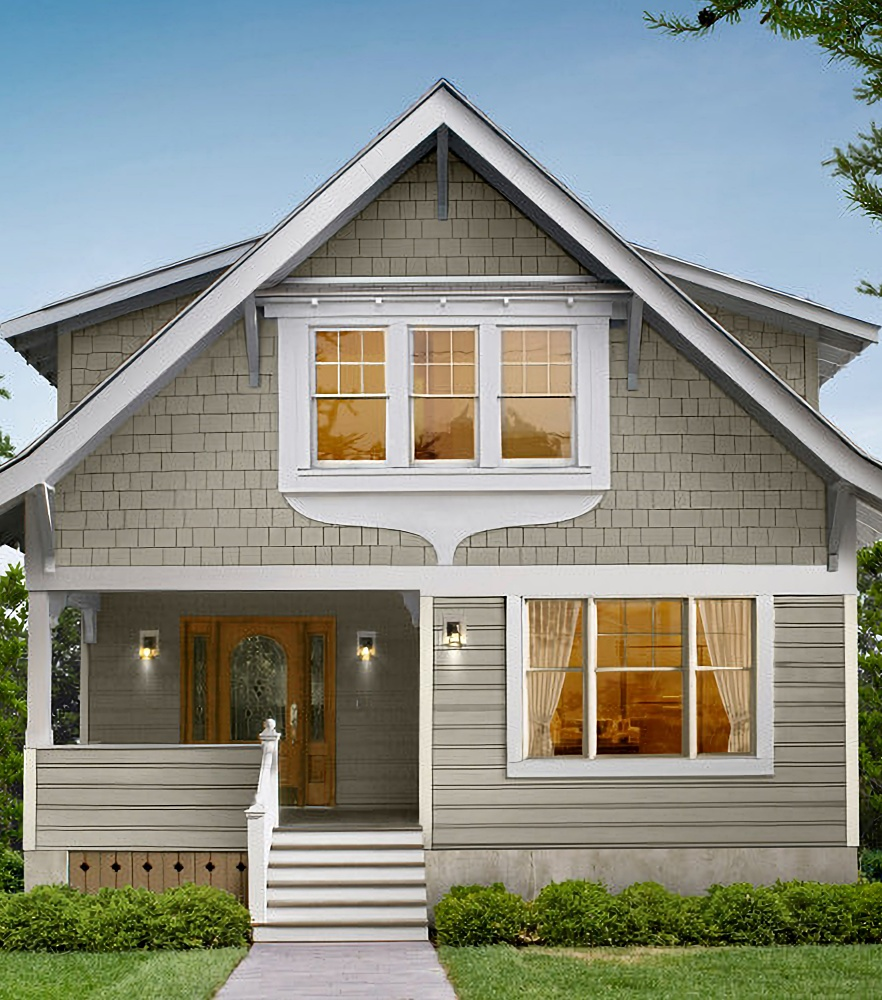
## Variáveis

- **id**: Identificador único para cada venda de casa.
  
- **date**: Data da venda da casa.

- **price**: Preço de venda da casa (variável dependente), que é o alvo do modelo de previsão.

- **bedrooms**: Número de quartos na casa, uma variável que pode influenciar diretamente no valor de mercado da propriedade.

- **bathrooms**: Número de banheiros na casa, também impactando a atratividade e o preço.

- **sqft_living**: Tamanho da área útil da casa em pés quadrados (ft²). Quanto maior o espaço interno, maior geralmente o preço de venda.

- **sqft_lot**: Tamanho do terreno em que a casa está construída, medido em pés quadrados (ft²). Pode influenciar o preço devido à possibilidade de expansão ou características do terreno.

- **floors**: Número de andares da casa. Casas com mais andares podem ter uma percepção de maior valor ou luxo.

- **waterfront**: Indicador binário (0 ou 1) se a casa está localizada à beira da água. Casas com vista para o mar ou um lago costumam ter preços mais elevados.

- **view**: Qualidade da vista a partir da casa (uma pontuação entre 0 e 4). Uma vista melhor pode aumentar o valor da casa.

- **condition**: Condição geral da casa (pontuação entre 1 e 5). Casas bem conservadas tendem a ter preços mais altos.

- **grade**: Qualidade da construção da casa, medida em uma escala de 1 a 13. Casas de maior qualidade de construção possuem preços mais elevados.

- **sqft_above**: Área útil da casa acima do nível do solo em pés quadrados (ft²). Reflete o espaço habitável disponível.

- **sqft_basement**: Área do porão da casa, também medida em pés quadrados (ft²). Porões grandes podem adicionar valor à propriedade.

- **yr_built**: Ano de construção da casa. Casas mais novas geralmente possuem um preço mais elevado devido a menor necessidade de manutenção.

- **yr_renovated**: Ano da última renovação da casa, caso tenha sido renovada. A renovação pode aumentar o valor de mercado da propriedade.

- **zipcode**: Código postal da localização da casa, o que pode indicar a área e influenciar o preço de venda devido a fatores regionais.

- **lat**: Latitude da localização da casa, importante para determinar a localização geográfica exata.

- **long**: Longitude da localização da casa, também relevante para identificar a localização precisa.

- **sqft_living15**: Tamanho da área útil da casa em 2015 (em ft²). Esta é uma versão mais recente da variável `sqft_living`, refletindo o tamanho atual.

- **sqft_lot15**: Tamanho do terreno em 2015 (em ft²). Reflete o tamanho atual do terreno, após possíveis modificações ou ampliações.

## Objetivo

O objetivo deste conjunto de dados é desenvolver um modelo de **Regressão Linear Multivariada** para prever o **Preço de Venda** das casas com base nas características acima.

### Variáveis

- **Variáveis Independentes**:
  - Bedrooms
  - Bathrooms
  - Sqft Living
  - Sqft Lot
  - Floors
  - Waterfront
  - View
  - Condition
  - Grade
  - Sqft Above
  - Sqft Basement
  - Yr Built
  - Yr Renovated
  - Zipcode
  - Lat
  - Long
  - Sqft Living15
  - Sqft Lot15

- **Variável Dependente**:
  - Price


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Setando o csv e importando libs iniciais**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
path_hse = "/content/drive/MyDrive/dados_20240808/kc_house_data(1).csv"

**Setando o csv**

In [ ]:
# Ler o arquivo CSV e carregar as primeiras linhas (o cabeçalho está na primeira linha do arquivo)
data = pd.read_csv(path_hse, encoding="ISO-8859-1")

#Tirando as colunas id e date porque são inúteis para o processamento de dados
data = data.drop(columns=['id', 'date'])

#Lendo CSV inteiro
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


**Verificando os tipos de dados para ocorrências de dados em branco**

In [ ]:
# Verificar as primeiras linhas dos dados
data.head()

# Análise descritiva básica
data.describe()

# Verificar tipos de dados e valores ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

**Análise de dados do CSV em relação à price (dependente)**

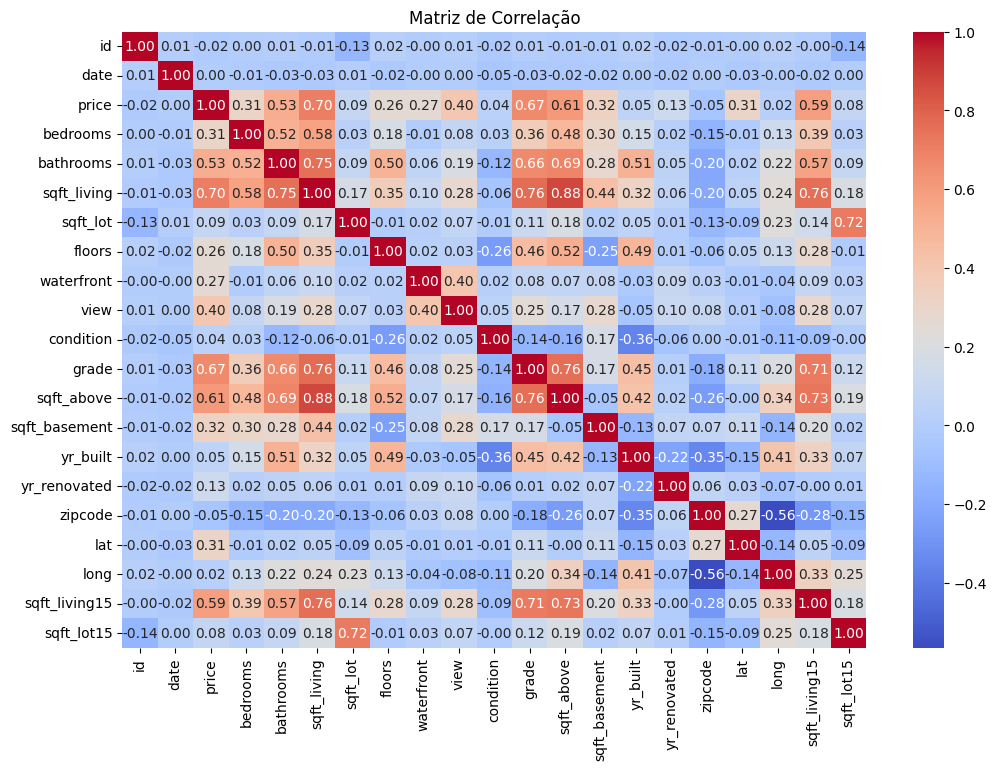

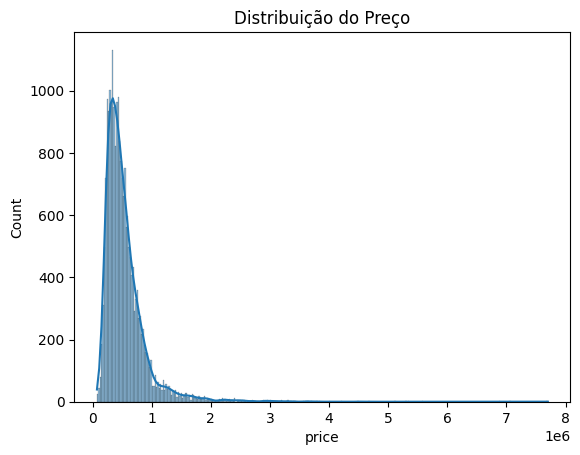

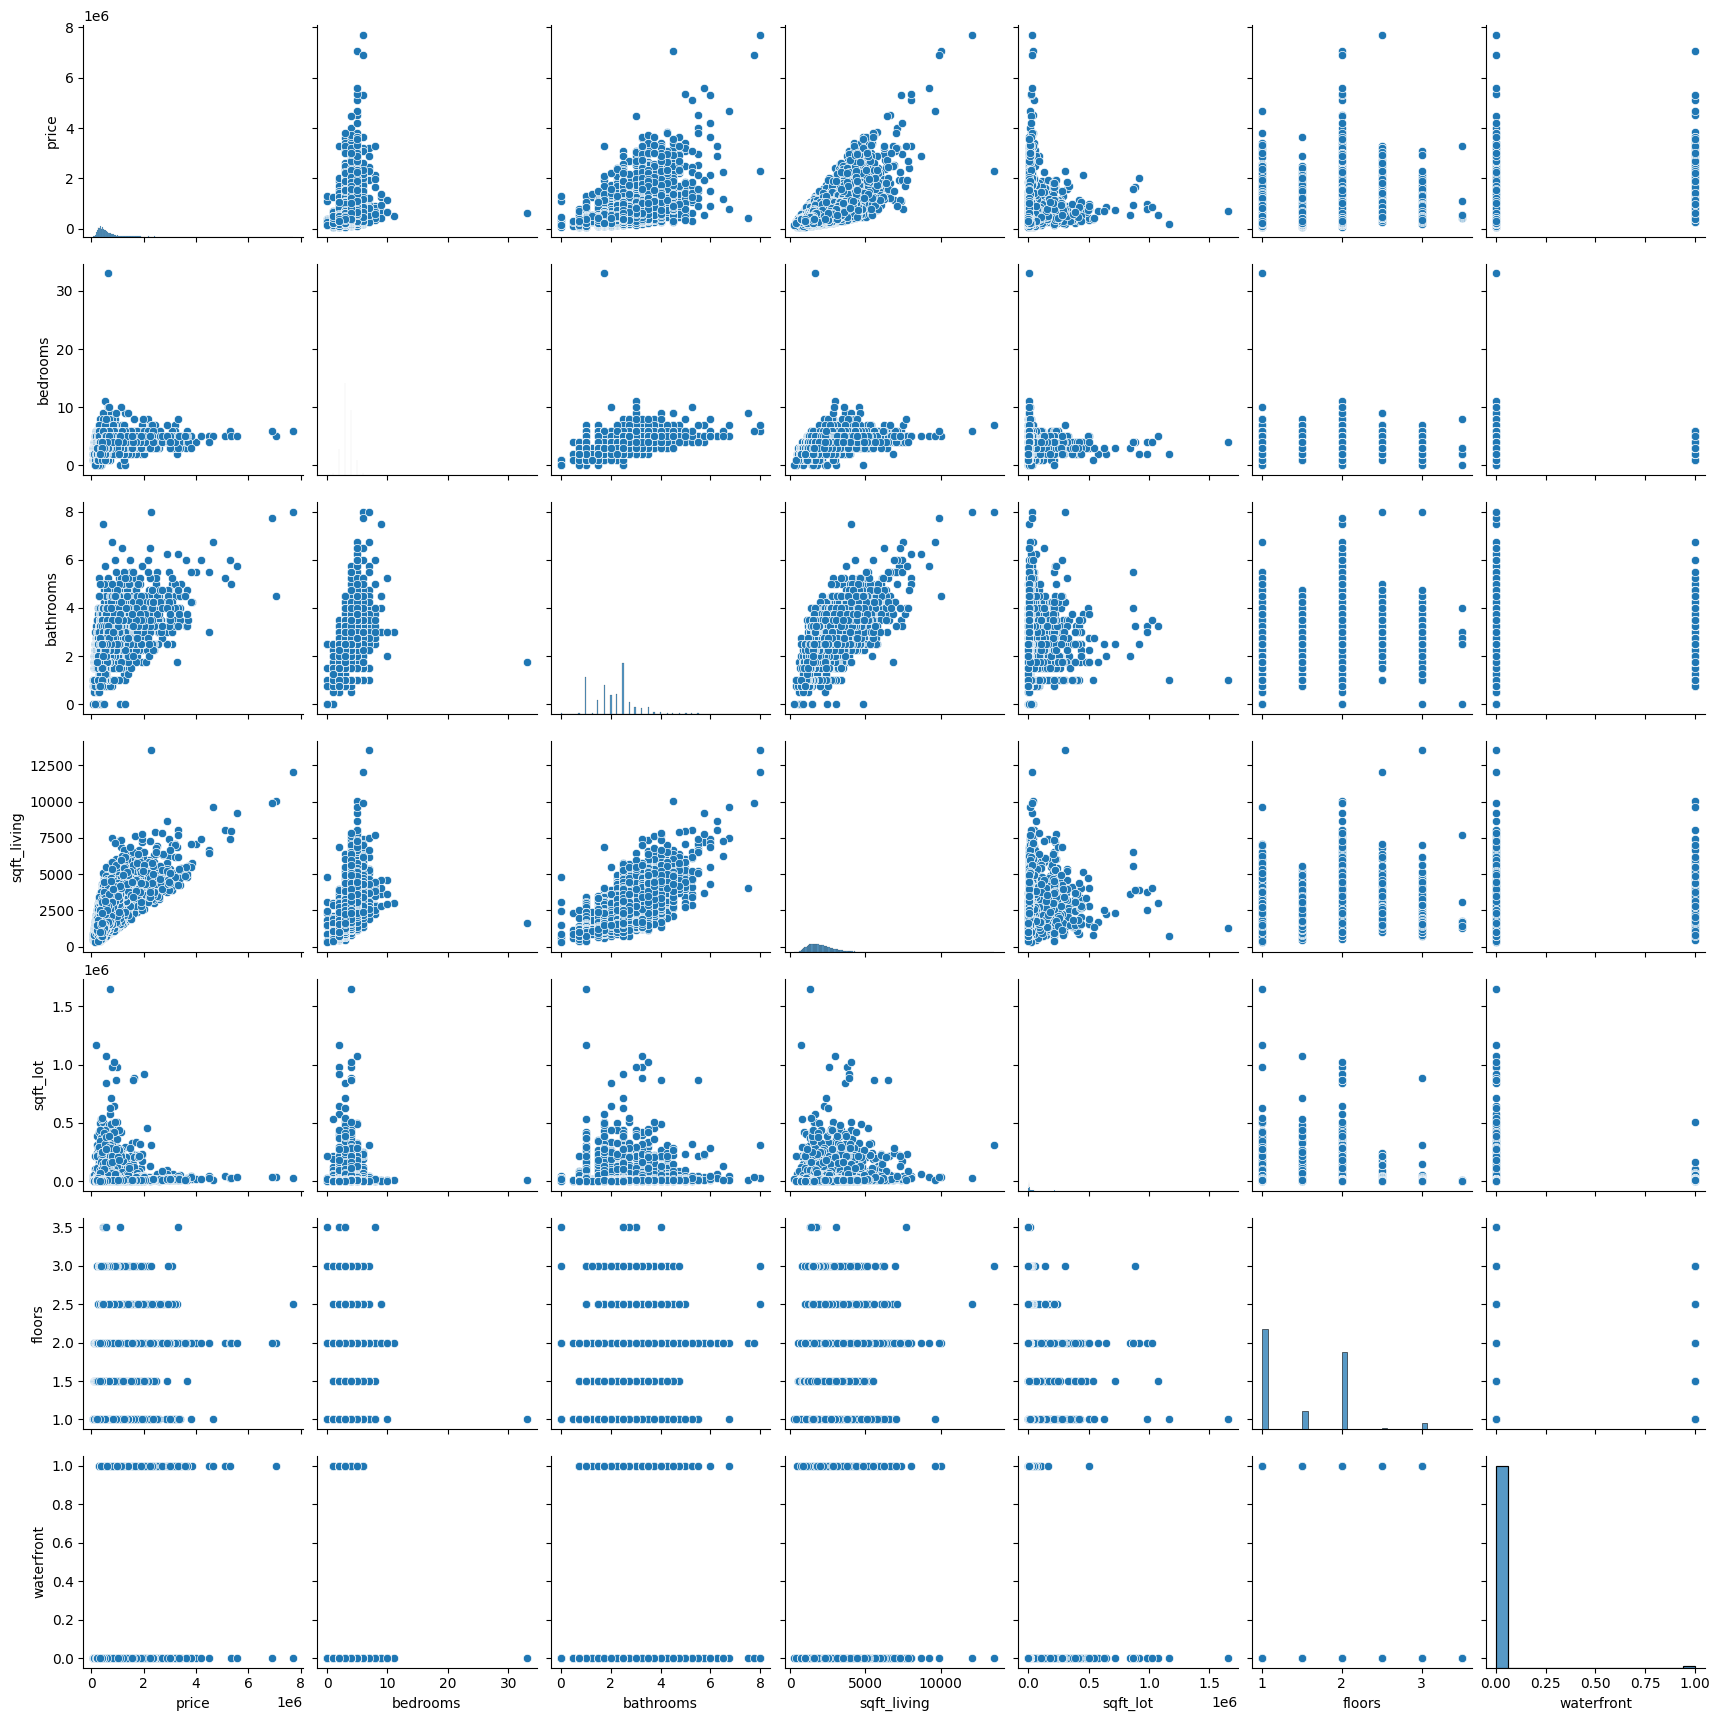

In [ ]:
# Verificar a correlação entre as variáveis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Análise das distribuições das variáveis
sns.histplot(data['price'], kde=True)
plt.title('Distribuição do Preço')
plt.show()

# Analisando a relação entre 'price' e outras variáveis
sns.pairplot(data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']])
plt.show()

**Divisão de dados**

In [ ]:
# Separar a variável independente (X) e a variável dependente (y)
X = data.drop(columns='price')
y = data['price']

# Dividir o conjunto de dados em treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Criando o modelo de Regressão Linear**



In [ ]:
# Criar o modelo de Regressão Linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Prever o preço no conjunto de teste
y_pred = model.predict(X_test)

caminho_modelo = '/content/drive/MyDrive/modelo.pkl'

joblib.dump(model, caminho_modelo)
print("Modelo salvo como 'modelo.pkl'")

Modelo salvo como 'modelo.pkl'


**Avaliação do modelo**

In [ ]:
# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

# Calculando o MAE (Erro Absoluto Médio)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE (Erro Absoluto Médio): {mae:.2f}')

# Calculando o MSE (Erro Quadrático Médio)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE (Erro Quadrático Médio): {mse:.2f}')

# Calculando o R² (Coeficiente de Determinação)
r2 = r2_score(y_test, y_pred)
print(f'R² (Coeficiente de Determinação): {r2:.4f}')

# Comparando o RMSE com a meta de 69.000
if rmse < 69000:
    print(f'O modelo atingiu a meta de RMSE abaixo de 69.000!')
else:
    print(f'O modelo não atingiu a meta de RMSE abaixo de 69.000.')


# Verificar coeficientes da regressão
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print(coef)

RMSE: 212539.52
MAE (Erro Absoluto Médio): 127493.34
MSE (Erro Quadrático Médio): 45173046132.79
R² (Coeficiente de Determinação): 0.7012
O modelo não atingiu a meta de RMSE abaixo de 69.000.
                 Coeficiente
bedrooms       -34335.418739
bathrooms       44564.528881
sqft_living       109.015817
sqft_lot            0.088847
floors           7003.129520
waterfront     562413.070005
view            53641.107022
condition       24526.710105
grade           94567.891697
sqft_above         70.022741
sqft_basement      38.993076
yr_built        -2680.768897
yr_renovated       20.415633
zipcode          -552.253038
lat            595968.122144
long          -194585.724048
sqft_living15      21.214331
sqft_lot15         -0.325832


**Teste**

In [ ]:
import pandas as pd

# Função para prever o preço de novas casas
def prever_preco(novas_casas):
    """Função para prever o preço de novas casas"""
    novas_casas = pd.DataFrame(novas_casas)
    preco_predito = model.predict(novas_casas)
    preco_predito = [f"R${round(preco, 2):,.2f}".replace(',', 'X').replace('.', ',').replace('X', '.') for preco in preco_predito]
    return preco_predito

novas_casas = {
    'bedrooms': [3, 4, 5, 2, 3],
    'bathrooms': [2, 3, 4, 1, 2],
    'sqft_living': [1500, 2200, 3000, 1200, 1800],
    'sqft_lot': [5000, 6000, 7000, 4000, 5500],
    'floors': [1, 2, 2, 1, 2],
    'waterfront': [0, 1, 1, 0, 0],
    'view': [0, 4, 3, 0, 2],
    'condition': [3, 4, 5, 2, 3],
    'grade': [7, 9, 8, 6, 7],
    'sqft_above': [1400, 2000, 2500, 1000, 1600],
    'sqft_basement': [100, 200, 500, 0, 100],
    'yr_built': [1995, 2005, 2010, 1980, 1999],
    'yr_renovated': [2015, 2020, 2022, 2010, 2018],
    'zipcode': [98101, 98103, 98104, 98001, 98004],
    'lat': [47.6097, 47.6297, 47.6400, 47.6800, 47.7100],
    'long': [-122.3331, -122.3121, -122.3000, -122.2500, -122.2200],
    'sqft_living15': [1500, 1800, 2500, 1300, 1700],
    'sqft_lot15': [4500, 5000, 6000, 3500, 4800]
}

# Prevendo os preços para as novas casas
precos = prever_preco(novas_casas)

# Exibindo os preços previstos
print("Preços previstos para as novas casas:")
for preco in precos:
    print(preco)

Preços previstos para as novas casas:
R$363.375,85
R$1.479.785,28
R$1.504.735,82
R$286.494,35
R$609.234,70


# Teste de interface

In [ ]:
print("De corretor para corretor, bem vindo a interface para orçamento de casas! Informe os seguintes dados:")
bedrooms = int(input("Número de quartos: "))
bathrooms = int(input("Número de banheiros: "))
sqft_living = int(input("Área útil (sqft): "))
sqft_lot = int(input("Área do terreno (sqft): "))
floors = int(input("Número de andares: "))
waterfront = int(input("Possui vista para o mar (1 para sim, 0 para não): "))
view = int(input("Qualidade da vista (0 a 4): "))
condition = int(input("Condição da casa (1 a 5): "))
grade = int(input("Nota da casa (1 a 13): "))
sqft_above = int(input("Área acima do solo (sqft): "))
sqft_basement = int(input("Área do porão (sqft): "))
yr_built = int(input("Ano de construção: "))
yr_renovated = int(input("Ano de reforma (0 se não foi reformada): "))
zipcode = int(input("CEP: "))
lat = float(input("Latitude: "))
long = float(input("Longitude: "))
sqft_living15 = int(input("Área útil em 2015: "))
sqft_lot15 = int(input("Área do terreno em 2015: "))

# Fazer a previsão
novas_casas = {
    'bedrooms': [bedrooms],
    'bathrooms': [bathrooms],
    'sqft_living': [sqft_living],
    'sqft_lot': [sqft_lot],
    'floors': [floors],
    'waterfront': [waterfront],
    'view': [view],
    'condition': [condition],
    'grade': [grade],
    'sqft_above': [sqft_above],
    'sqft_basement': [sqft_basement],
    'yr_built': [yr_built],
    'yr_renovated': [yr_renovated],
    'zipcode': [zipcode],
    'lat': [lat],
    'long': [long],
    'sqft_living15': [sqft_living15],
    'sqft_lot15': [sqft_lot15]
}

precos = prever_preco(novas_casas)
print(f"Preço estimado da casa: ${precos[0]:,.2f}")